# Assignment 2

## Part 2

### Mohammed Mohsin Dyer
### #V00930385

__2 Qiskit Simulators__ 

In [1]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [2]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [3]:
simulator = Aer.get_backend('aer_simulator')

__Simulating Quantum Circuit__

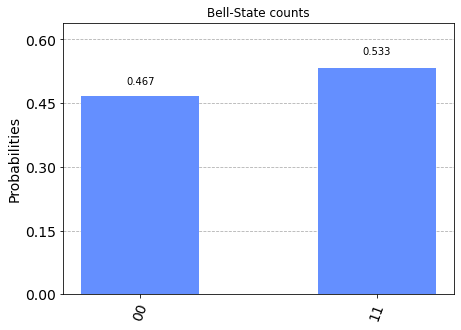

In [27]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [8]:
# Run and get memory
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['11', '00', '00', '11', '00', '00', '11', '11', '11', '11']


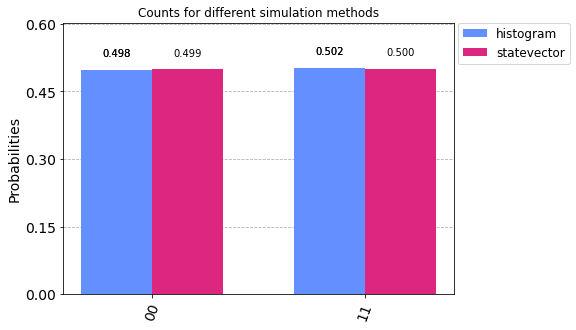

In [22]:
# Increase shots to reduce sampling variance
shots = 10000

# State Histogram simulation method
sim_stabilizer = Aer.get_backend('aer_simulator')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

# Statevector simulation method
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

plot_histogram([counts_stabilizer, counts_statevector],
               title='Counts for different simulation methods',
               legend=['histogram', 'statevector'])

In [23]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_unitary()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get unitary
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", unitary.round(5))

Circuit unitary:
 [[ 0.70711+0.j  0.70711-0.j  0.     +0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j -0.70711+0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j  0.70711-0.j]
 [ 0.70711+0.j -0.70711+0.j  0.     +0.j  0.     +0.j]]


__References__

https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html